<a href="https://colab.research.google.com/github/sudarshan-koirala/youtube-stuffs/blob/main/llamaindex/LlamaIndex_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LlamaIndex
## [Youtube Video covering this notebook](https://youtu.be/QNKeNiRjtGQ?si=UFH9WL5nXvmj2EM1)
- [LlamaIndex Website](https://www.llamaindex.ai/)
- [LangChain Website](https://python.langchain.com/docs/get_started/introduction)
-[Retrieval-Augmented Generation (RAG)](https://research.ibm.com/blog/retrieval-augmented-generation-RAG)


## Install libraries and Env Setup

In [7]:
# %%capture
%pip install llama-index openai

In [8]:
import os
# https://platform.openai.com/account/api-keys
os.environ["OPENAI_API_KEY"] = ""

## Implementation

In [10]:
# Import necessary packages
from llama_index.llms.openai import OpenAI
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from IPython.display import Markdown, display

In [12]:
# VectorStoreIndex??
#SimpleDirectoryReader??

In [14]:
import os
import subprocess

# Specify the URL of the PDF file you want to download
pdf_url = "https://browse.arxiv.org/pdf/1706.03762.pdf"

# Specify the directory where you want to save the PDF file
download_dir = "data"

# Specify the desired new name for the downloaded PDF file
new_filename = "attention-is-all-you-need.pdf"

# Create the directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

# Use wget to download the PDF file into the directory
command = f"wget -P {download_dir} {pdf_url}"

# Execute the wget command using subprocess
try:
    subprocess.run(command, shell=True, check=True)
    print(f"PDF downloaded successfully to {download_dir}")

    # Rename the downloaded file to the desired name
    old_filepath = os.path.join(download_dir, os.path.basename(pdf_url))
    new_filepath = os.path.join(download_dir, new_filename)
    os.rename(old_filepath, new_filepath)
    print(f"PDF renamed to {new_filename}")
except subprocess.CalledProcessError as e:
    print(f"Error: {e}")

--2024-04-17 19:25:52--  https://browse.arxiv.org/pdf/1706.03762.pdf
Resolving browse.arxiv.org (browse.arxiv.org)... 34.160.61.147
Connecting to browse.arxiv.org (browse.arxiv.org)|34.160.61.147|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://browse.arxiv.org/pdf/1706.03762 [following]
--2024-04-17 19:25:52--  http://browse.arxiv.org/pdf/1706.03762
Connecting to browse.arxiv.org (browse.arxiv.org)|34.160.61.147|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://browse.arxiv.org:443/pdf/1706.03762 [following]
--2024-04-17 19:25:52--  https://browse.arxiv.org/pdf/1706.03762
Connecting to browse.arxiv.org (browse.arxiv.org)|34.160.61.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/pdf]
Saving to: ‘data/1706.03762.pdf’

     0K .......... .......... .......... .......... ..........  695K
    50K .......... .......... .......... .......... 

PDF downloaded successfully to data
PDF renamed to attention-is-all-you-need.pdf


                                          423K=4,2s

2024-04-17 19:25:57 (511 KB/s) - ‘data/1706.03762.pdf’ saved [2215244]



In [15]:
%%capture
%pip install pypdf

## Load documents and build index

In [16]:
#document loader
documents = SimpleDirectoryReader("data").load_data()

In [17]:
len(documents)

15

In [18]:
documents[0]

Document(id_='526bd375-4e2e-4f27-9a50-1606c17568eb', embedding=None, metadata={'page_label': '1', 'file_name': 'attention-is-all-you-need.pdf', 'file_path': '/Users/john/Dev/Playground/AI/llama-index/llama-index-intro/data/attention-is-all-you-need.pdf', 'file_type': 'application/pdf', 'file_size': 2215244, 'creation_date': '2024-04-17', 'last_modified_date': '2024-04-13'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@goog

[LlamaIndex Vector Store Index](https://gpt-index.readthedocs.io/en/latest/core_modules/data_modules/index/vector_store_guide.html)

In [19]:
# build index/vectorstore (document splitting, embedding, storing embeddings + chunks)
index = VectorStoreIndex.from_documents(documents)

### Query
Start querying by getting the default query engine

In [20]:
query_engine = index.as_query_engine() #no history preserved

In [21]:
response = query_engine.query("What is the paper about ?")

In [22]:
response

Response(response='The paper is about analyzing attention mechanisms in neural networks, specifically focusing on the behavior of attention heads in an encoder self-attention model.', source_nodes=[NodeWithScore(node=TextNode(id_='ba3f5fbd-f204-4742-bc3d-29af0220aac2', embedding=None, metadata={'page_label': '14', 'file_name': 'attention-is-all-you-need.pdf', 'file_path': '/Users/john/Dev/Playground/AI/llama-index/llama-index-intro/data/attention-is-all-you-need.pdf', 'file_type': 'application/pdf', 'file_size': 2215244, 'creation_date': '2024-04-17', 'last_modified_date': '2024-04-13'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='90c21688-8c58-407b-b9e6-b3a4f6ae40d1', node_type=<ObjectType.DOCUMENT: '4

In [23]:
display(Markdown(f"<b>{response}</b>"))

<b>The paper is about analyzing attention mechanisms in neural networks, specifically focusing on the behavior of attention heads in an encoder self-attention model.</b>

### Storing and Loading the Index

In [24]:
index.storage_context.persist()

In [26]:
from llama_index.core import StorageContext, load_index_from_storage

storage_context = StorageContext.from_defaults(persist_dir="./storage")
index = load_index_from_storage(storage_context=storage_context)

## We used the default one,  How to Customize It ??
[Customizing LLms within LlamaIndex](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html)

In [40]:
from llama_index.core import ServiceContext, Settings, set_global_service_context
from llama_index.core.node_parser import SentenceSplitter
from llama_index.llms.openai import OpenAI
# alternatively
# from langchain.llms import ...

In [46]:
#define LLM
llm = OpenAI(temperature=0.1, model="gpt-3.5-turbo", max_tokens=512)


Settings.llm = llm
Settings.node_parser = SentenceSplitter(chunk_size=500, chunk_overlap=50)

# set_global_service_context(service_context)
index = VectorStoreIndex.from_documents(documents)

In [47]:
query_engine = index.as_query_engine(streaming=True)
response = query_engine.query("What is the paper about ?")
response.print_response_stream()

The paper appears to be about a study or analysis related to attention mechanisms in natural language processing models, specifically focusing on an attention-based model called "attention-is-all-you-need." The study delves into the behavior and performance of attention heads within the model, particularly in relation to tasks like anaphora resolution and sentence structure understanding.

In [50]:
%pip install llama-index-llms-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 19.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.9/415.9 kB 10.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 25.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 10.6 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


## Using LLM From HuggingFace [LINK](https://gpt-index.readthedocs.io/en/latest/core_modules/model_modules/llms/usage_custom.html#example-using-a-huggingface-llm)

In [ ]:
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core.prompts import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

import torch
from llama_index.llms.huggingface import HuggingFaceLLM
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

In [ ]:
%%capture
!pip install transformers[torch]

In [ ]:
import torch
from llama_index.llms import HuggingFaceLLM
from llama_index.prompts import PromptTemplate

system_prompt = """<|SYSTEM|># StableLM Tuned (Alpha version)
- StableLM is a helpful and harmless open-source AI language model developed by StabilityAI.
- StableLM is excited to be able to help the user, but will refuse to do anything that could be considered harmful to the user.
- StableLM is more than just an information source, StableLM is also able to write poetry, short stories, and make jokes.
- StableLM will refuse to participate in anything that could harm a human.
"""

# This will wrap the default prompts that are internal to llama-index
query_wrapper_prompt = PromptTemplate("<|USER|>{query_str}<|ASSISTANT|>")

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.7, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="StabilityAI/stablelm-tuned-alpha-3b",
    model_name="StabilityAI/stablelm-tuned-alpha-3b",
    device_map="auto",
    stopping_ids=[50278, 50279, 50277, 1, 0],
    tokenizer_kwargs={"max_length": 4096},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

KeyboardInterrupt: ignored

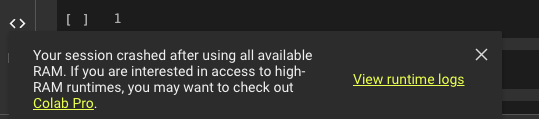

In [ ]:
# configure service context
service_context = ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    #embed_model="local"
)

In [ ]:
index = VectorStoreIndex.from_documents(documents, service_context=service_context)